In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from numpy import nan
from sklearn.ensemble import BaggingClassifier

In [45]:
fminsttrain= pd.read_csv(r'C:\Users\avida\Downloads\archive (7)\fashion-mnist_train.csv')

In [46]:
train_x=fminsttrain['label']


In [47]:
fminsttrain.isnull().any().sum()

0

In [48]:
fminsttrain['label']

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [49]:
y_train = fminsttrain['label']
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [50]:
X_train= fminsttrain.drop(['label'],axis = 1)
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_train.shape

(60000, 784)

In [52]:
scale = StandardScaler()
X_train = pd.DataFrame(scale.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)

In [53]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
1,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
2,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,0.198798,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,0.275910,0.389449,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
3,-0.009505,-0.022693,-0.028907,0.366132,0.406799,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.549579,-0.476945,-0.395154,-0.406441,-0.440185,-0.374570,-0.287717,-0.158258,-0.091432,-0.033046
4,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
59996,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,0.666865,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
59997,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,2.178732,2.839056,3.487716,2.664137,1.373435,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
59998,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046


In [54]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

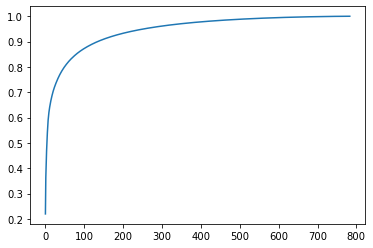

In [55]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [56]:
pca = PCA(n_components=0.85)
train_pca =pca.fit_transform(X_train)
X_test_pca = pca.transform(X_val)

In [57]:
X_train_PCA1 = pd.DataFrame(train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

In [58]:
train_pca.shape

(48000, 81)

In [59]:
xgb_reg = xgboost.XGBClassifier(n_estimators = 150,n_jobs = -1,learning_rate = 0.5, seed = 0,eval_metric='mlogloss',use_label_encoder=False)
xgb_reg.fit(X_train_PCA1, y_train)
y_train_xgb_reg = xgb_reg.predict(X_train_PCA1)
y_pred_xgb_reg = xgb_reg.predict(X_test_PCA1)
xgb_reg_train = metrics.accuracy_score(y_train,y_train_xgb_reg)
xgb_reg_accuracy = metrics.accuracy_score(y_val, y_pred_xgb_reg)


print("Test Accuracy score: {}".format(xgb_reg_accuracy))
print(metrics.classification_report(y_val, y_pred_xgb_reg))

Test Accuracy score: 0.8801666666666667
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1232
           1       0.99      0.97      0.98      1174
           2       0.80      0.82      0.81      1200
           3       0.88      0.90      0.89      1242
           4       0.79      0.81      0.80      1185
           5       0.95      0.95      0.95      1141
           6       0.71      0.66      0.69      1243
           7       0.94      0.95      0.94      1224
           8       0.96      0.98      0.97      1149
           9       0.95      0.95      0.95      1210

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



In [ ]:
random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(X_train_PCA1, y_train)
y_train_forest = random_forest.predict(X_train_PCA1)
y_pred_forest = random_forest.predict(X_test_pca)
random_forest_train = metrics.accuracy_score(y_train,y_train_forest)
random_forest_accuracy = metrics.accuracy_score(y_val, y_pred_forest)

print("Test Accuracy score: {}".format(random_forest_accuracy))
print(metrics.classification_report(y_val, y_pred_forest))

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_PCA1,y_train)
y_pred = gnb.predict(X_test_PCA1)
label, count = np.unique(np.array(y_pred), return_counts=True)
print("Test Accuracy score: {}".format(metrics.accuracy_score(y_val, y_pred)))
print(metrics.classification_report(y_val, y_pred))

In [ ]:
clf = LogisticRegression()
clf.fit(X_train_PCA1,y_train)
y_pred_logistic= clf.predict(X_test_PCA1)
print("Test Accuracy score: {}".format(metrics.accuracy_score(y_val, y_pred_logistic)))
print(metrics.classification_report(y_val, y_pred_logistic))

In [61]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = xgboost.XGBClassifier(n_estimators = 150,n_jobs = -1,learning_rate = 0.5, seed = 0,eval_metric='mlogloss',use_label_encoder=False)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),('xgb', xgb_clf)],
    voting='soft',n_jobs=-1)
voting_clf.fit(X_train_PCA1,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            eval_metric='mlogloss', gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.5,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
    

In [62]:
for clf in( log_clf, rnd_clf, xgb_clf,voting_clf):
    clf.fit(X_train_PCA1,y_train)
    y_pred_clf=clf.predict(X_test_PCA1)
    print(clf.__class__.__name__,accuracy_score(y_val,y_pred_clf))

LogisticRegression 0.83475
RandomForestClassifier 0.8659166666666667
XGBClassifier 0.8801666666666667
VotingClassifier 0.88


In [66]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = xgboost.XGBClassifier(n_estimators = 150,n_jobs = -1,learning_rate = 0.5, seed = 0,eval_metric='mlogloss',use_label_encoder=False)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),('xgb', xgb_clf)],
    voting='hard',n_jobs=-1)

In [67]:
from sklearn.ensemble import StackingClassifier

estimator_list = [
    ('xgb_clf',xgb_clf),
    ('rnd_clf',rnd_clf),
    ('voting_clf',voting_clf),
    ('log_clf',log_clf),]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=xgboost.XGBClassifier(n_estimators = 150,n_jobs = -1,learning_rate = 0.5, seed = 0,eval_metric='mlogloss',use_label_encoder=False)
)

# Train stacked model
stack_model.fit(X_train_PCA1,y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train_PCA1)
y_test_pred = stack_model.predict(X_test_PCA1)


# Test set model performance
stack_model_test_accuracy = accuracy_score(y_val, y_test_pred) # Calculate Accuracy

print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)

Model performance for Test set
- Accuracy: 0.87625


In [1]:
bag_clf = BaggingClassifier(
StackingClassifier(n_jobs=-1,estimators=estimator_list, final_estimator=LogisticRegression()),bootstrap=True)
bag_clf.fit(X_train_PCA1,y_train)
y_pred_bagging= bag_clf.predict(X_test_PCA1)
print("Test Accuracy score: {}".format(metrics.accuracy_score(y_val, y_pred_bagging)))
print(metrics.classification_report(y_val, y_pred_bagging))

NameError: name 'BaggingClassifier' is not defined

In [ ]:
pasting_clf = BaggingClassifier(
StackingClassifier(n_jobs=-1,estimators=estimator_list, final_estimator=LogisticRegression())bootstrap=False)
pasting_clf.fit(X_train_PCA1,y_train)
y_pred_pasting= pasting_clf.predict(X_test_PCA1)
print("Test Accuracy score: {}".format(metrics.accuracy_score(y_val, y_pred_pasting)))
print(metrics.classification_report(y_val, y_pred_pasting))